# Exploring Amazon Images for Kaggle Competition

In [28]:
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plot
import seaborn as sns
sns.set_style("white")
%matplotlib inline

pal = sns.color_palette()

df_train = pd.read_csv('train_v2.csv')
df_train.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


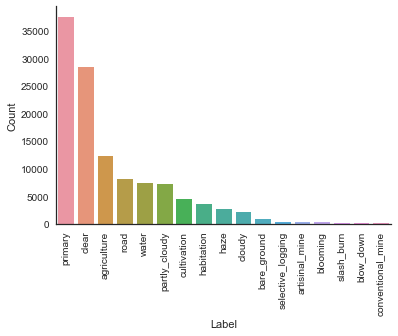

In [42]:
labels = df_train['tags'].apply(lambda x: x.split(' '))
from collections import Counter, defaultdict
counts = defaultdict(int)
for l in labels:
    for l2 in l:
        counts[l2] += 1
df_counts = pd.DataFrame(list(counts.items()),columns=["Label","Count"])
#df_counts.columns
df_counts = df_counts.sort_values("Count",ascending=False)
g = sns.barplot(x="Label",y="Count",data=df_counts)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set(ylabel="Count")
sns.despine()


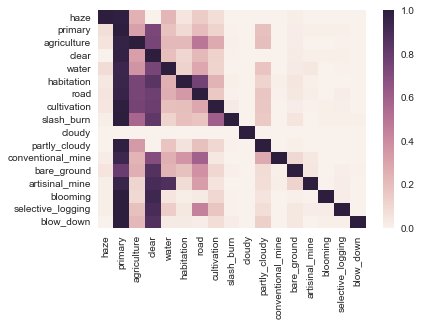

In [48]:
# Co-occurence Matrix
com = np.zeros([len(counts)]*2)
for i, l in enumerate(list(counts.keys())):
    for i2, l2 in enumerate(list(counts.keys())):
        c = 0
        cy = 0
        for row in labels.values:
            if l in row:
                c += 1
                if l2 in row: cy += 1
        com[i, i2] = cy / c

sns.heatmap(com,xticklabels=list(counts.keys()),yticklabels=list(counts.keys()))
#data=[go.Heatmap(z=com, x=list(counts.keys()), y=list(counts.keys()))]
#layout=go.Layout(height=800, width=800, title='Co-occurence matrix of training labels')
#fig=dict(data=data, layout=layout)
#py.iplot(data, filename='train-com')